# Import Packages and libraries

In [8]:
import pandas as pd
import numpy as np
import sklearn
import pycaret
import imblearn as im
from pandas.api.types import CategoricalDtype
from pycaret.classification import *
#from imblearn.over_sampling import ADASYN, BorderlineSMOTE, KMeansSMOTE, RandomOverSampler
#from imblearn.over_sampling import SMOTE,SMOTENC, SVMSMOTE
from imblearn.over_sampling import *
from imblearn.under_sampling import *
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, EditedNearestNeighbours, RepeatedEditedNearestNeighbours,AllKNN, InstanceHardnessThreshold, NearMiss, NeighbourhoodCleaningRule, OneSidedSelection, TomekLinks, ClusterCentroids
from sklearn.metrics import average_precision_score

import os
os.environ["GIT_PYTHON_REFRESH"] = "quiet"
import git

# Reading the TAVR Data

In [9]:
df = pd.read_csv('NewRawMLTavrDataCat.csv') # reading the csv containing all the data
df.columns = df.columns.str.lower()

df.head() # printing the first five rows of the data

,id,year,key_nis,died,age,female,race,elective,aweekend,zipinc_qrtl,...,sepsis,smoker,valvular_disease,weight_loss,endovascular_tavr,transapical_tavr,ppm_placement,conversion_to_savr,vascular_complications,major_bleeding
0,1,2012,10294859,No,67,Female,White,Elective,No,ThirdQ,...,No,No,Yes,No,Yes,No,No,No,No,No
1,2,2012,10019518,No,90,Male,White,Elective,No,ThirdQ,...,No,No,Yes,No,Yes,No,No,No,No,No
2,3,2012,10155781,No,90,Male,White,NonElective,No,FourthQ,...,No,Yes,Yes,No,Yes,No,Yes,No,No,No
3,4,2012,10103697,No,80,Female,White,NonElective,No,FirstQ,...,No,Yes,Yes,No,No,Yes,Yes,No,No,No
4,5,2012,10330854,No,84,Female,White,Elective,No,FourthQ,...,No,No,Yes,No,No,Yes,No,No,No,No


In [10]:
df = df.dropna(how='any', subset=['race','zipinc_qrtl','elective'])

In [11]:
#data.drop(data.columns[[0,2,11,8,15,14,34,31,33,53,16,17,19,22,24,49,50,56,57,58,59]],axis=1, inplace=True)


#data.drop(data.columns[[0,2,16,17,19,22,24,49,50,56,57,58,59]],axis=1, inplace=True) #All 45 All
data.drop(data.columns[[0,2,16,17,19,22,24,49,50,56,57,58,59,31,8,34]],axis=1, inplace=True) #All 40
#data.drop(data.columns[[0,2,16,17,19,22,24,49,50,56,57,58,59,31,8,34,11,14,15,33,13,52,9,6,20,40]],axis=1, inplace=True) #All 30
#data.drop(data.columns[[0,2,16,17,19,22,24,49,50,56,57,58,59,31,8,34,11,14,15,33,13,52,9,6,20,40,12,43,38,47,10,29,36,25,42,44]],axis=1, inplace=True) #All 20
#data.drop(data.columns[[0,2,16,17,19,22,24,49,50,56,57,58,59,31,8,34,11,14,15,33,13,52,9,6,20,40,12,43,38,47,10,29,36,25,42,44,30,18,21,27,48,45,46,26,5,51]],axis=1, inplace=True) #All 10
#data.drop(data.columns[[0,2,16,17,19,22,24,49,50,56,57,58,59,31,8,34,11,14,15,33,13,52,9,6,20,40,12,43,38,47,10,29,36,25,42,44,30,18,21,27,48,45,46,26,5,51,53,7,28,37,32]],axis=1, inplace=True) #All 5


data.info()

In [12]:
# converting all columns of type object to categorical
df.loc[:, df.dtypes == 'object'] =\
    df.select_dtypes(['object'])\
    .apply(lambda x: x.astype('category'))

# Over Sampling

In [13]:
ros = RandomOverSampler(sampling_strategy='minority')
ros_setup = setup(df, target = 'died', train_size = 0.8,session_id=2022, experiment_name='tavr_ros')

,Description,Value
0,session_id,2022
1,Target,died
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(54739, 47)"
5,Missing Values,1
6,Numeric Features,2
7,Categorical Features,44
8,Ordinal Features,0
9,High Cardinality Features,0


## RandomOverSampler

In [14]:
ros = RandomOverSampler(sampling_strategy='minority')
ros_setup = setup(df, target = 'died', train_size = 0.8, preprocess = True, imputation_type = 'iterative', categorical_imputation = 'constant',
                      handle_unknown_categorical = True, fix_imbalance=True, fix_imbalance_method=ros, fold_strategy = 'stratifiedkfold', fold = 5, n_jobs = -1,
                      session_id=2022, experiment_name='tavr_ros', log_experiment=True ,normalize = True, normalize_method ='minmax', feature_selection= True, remove_multicollinearity= True)

,Description,Value
0,session_id,2022
1,Target,died
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(54739, 47)"
5,Missing Values,1
6,Numeric Features,2
7,Categorical Features,44
8,Ordinal Features,0
9,High Cardinality Features,0


In [15]:
# adding specificity and balanced accuracy to the computed metrics
add_metric('Spec', 'Spec.', im.metrics.specificity_score)
add_metric('Balanced Accuracy', 'Balanced Accuracy', sklearn.metrics.balanced_accuracy_score)
add_metric('AUPRC_ID','AUPRC',sklearn.metrics.average_precision_score, greater_is_better = True)

Name                                                 Balanced Accuracy
Display Name                                         Balanced Accuracy
Score Function       <function balanced_accuracy_score at 0x000002B...
Scorer                            make_scorer(balanced_accuracy_score)
Target                                                            pred
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: Balanced_Accuracy, dtype: object

In [16]:
best_models_ros = compare_models(sort = 'Balanced Accuracy')
#best = compare_models(sort = 'Balanced Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy,TT (Sec)
svm,SVM - Linear Kernel,0.8022,0.0000,0.6599,0.0663,0.1202,0.0867,0.1635,0.8052,0.7325,1.6280
lda,Linear Discriminant Analysis,0.7832,0.7995,0.6768,0.0611,0.1120,0.0778,0.1560,0.7854,0.7311,0.9420
ridge,Ridge Classifier,0.7829,0.0000,0.6734,0.0607,0.1114,0.0772,0.1547,0.7852,0.7293,0.1740
gbc,Gradient Boosting Classifier,0.8028,0.8064,0.6508,0.0647,0.1177,0.0840,0.1597,0.8060,0.7284,7.6420
lr,Logistic Regression,0.7696,0.7980,0.6847,0.0582,0.1072,0.0727,0.1507,0.7714,0.7281,3.5540
ada,Ada Boost Classifier,0.7807,0.7944,0.6712,0.0599,0.1100,0.0757,0.1527,0.7829,0.7271,1.9540
nb,Naive Bayes,0.7866,0.7384,0.5853,0.0545,0.0998,0.0652,0.1284,0.7907,0.6880,0.2320
lightgbm,Light Gradient Boosting Machine,0.8807,0.7791,0.4791,0.0817,0.1396,0.1088,0.1602,0.8890,0.6840,0.7760
xgboost,Extreme Gradient Boosting,0.9448,0.7129,0.2181,0.1005,0.1376,0.1130,0.1222,0.9598,0.5889,6.9120
catboost,CatBoost Classifier,0.9604,0.7163,0.1944,0.1446,0.1656,0.1459,0.1476,0.9762,0.5853,11.5420


In [ ]:
 #check feature importance
#plot_model(best_models_ros, plot = 'feature')

In [ ]:
dummy = create_model('dummy')

In [ ]:
predict_model(dummy);

In [ ]:
plot_model(dummy, plot = 'confusion_matrix')

### Logistic Regression (lr)

In [9]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,0.7677,0.8029,0.6893,0.0580,0.1071,0.0725,0.1511,0.7693,0.7293
1,0.7716,0.8058,0.7062,0.0603,0.1111,0.0767,0.1586,0.7730,0.7396
2,0.7640,0.8079,0.7062,0.0584,0.1079,0.0733,0.1544,0.7652,0.7357
3,0.7740,0.7660,0.6215,0.0544,0.1000,0.0653,0.1331,0.7772,0.6993
4,0.7743,0.8079,0.6780,0.0588,0.1083,0.0738,0.1512,0.7762,0.7271
Mean,0.7703,0.7981,0.6802,0.0580,0.1069,0.0723,0.1497,0.7722,0.7262
SD,0.0040,0.0161,0.0313,0.0020,0.0037,0.0038,0.0087,0.0045,0.0142


In [10]:
#Tune a Model
tuned_lr = tune_model(lr,optimize = 'Balanced Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,0.7642,0.8036,0.6893,0.0572,0.1057,0.0710,0.1492,0.7658,0.7275
1,0.7724,0.8047,0.7006,0.0601,0.1107,0.0763,0.1573,0.7739,0.7372
2,0.7651,0.8111,0.7006,0.0583,0.1076,0.0730,0.1532,0.7665,0.7335
3,0.7752,0.7662,0.6271,0.0551,0.1013,0.0666,0.1355,0.7782,0.7027
4,0.7738,0.8072,0.6836,0.0591,0.1089,0.0744,0.1527,0.7757,0.7296
Mean,0.7702,0.7985,0.6802,0.0580,0.1068,0.0723,0.1496,0.7720,0.7261
SD,0.0046,0.0164,0.0274,0.0017,0.0032,0.0033,0.0075,0.0050,0.0122


In [ ]:
#AUC Plot
#plot_model(tuned_lr, plot = 'auc')
#Precision-Recall Curve
#plot_model(tuned_lr, plot = 'pr')
# Feature Importance Plot
#plot_model(tuned_lr, plot='feature')
# Confusion Matrix
#plot_model(tuned_lr, plot = 'confusion_matrix')

#evaluate_model(tuned_lr)

In [10]:
#Predict on test / hold-out Sample
predict_model(tuned_lr);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,Logistic Regression,0.7709,0.8179,0.7193,0.0629,0.1157,0.0804,0.1647,0.7720,0.7457


In [11]:
predict_model(lr);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,Logistic Regression,0.7712,0.8179,0.7193,0.0630,0.1158,0.0806,0.1649,0.7723,0.7458


In [ ]:
# Confusion Matrix
#plot_model(tuned_lr, plot = 'confusion_matrix')

In [ ]:
#plot_model(tuned_lr, plot='feature_all')

In [ ]:
#pd.DataFrame({'Feature': get_config('X_train').columns, 'Value' : abs(lr.coef_[0])}).sort_values(by='Value', ascending=False)


In [ ]:
#plot_model(lr, plot = 'threshold')


In [ ]:
#plot_model(tuned_lr,plot='boundary')

In [ ]:
#print (lr.coef_)

In [ ]:
#print (lr.intercept_)

In [ ]:
#evaluate_model(tuned_lr)

In [ ]:
#interpret_model(lr, plot = 'reason', observation = 12)

In [ ]:
#print(tuned_lr.get_params())

### Linear Discriminant Analysis(lda)

In [12]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,0.7821,0.8029,0.6893,0.0617,0.1133,0.0792,0.1593,0.7840,0.7366
1,0.7841,0.8058,0.6893,0.0623,0.1143,0.0802,0.1605,0.7860,0.7377
2,0.7754,0.8119,0.6949,0.0604,0.1112,0.0768,0.1572,0.7771,0.7360
3,0.7848,0.7695,0.6271,0.0575,0.1054,0.0710,0.1409,0.7880,0.7076
4,0.7866,0.8085,0.6667,0.0612,0.1121,0.0780,0.1548,0.7891,0.7279
Mean,0.7826,0.7997,0.6734,0.0606,0.1113,0.0770,0.1546,0.7848,0.7291
SD,0.0039,0.0154,0.0251,0.0017,0.0031,0.0032,0.0071,0.0043,0.0113


In [13]:
#Tune a Model
tuned_lda = tune_model(lda,optimize = 'Balanced Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,0.7725,0.7956,0.7062,0.0605,0.1115,0.0771,0.1591,0.7738,0.7400
1,0.7772,0.8082,0.7006,0.0613,0.1128,0.0785,0.1601,0.7788,0.7397
2,0.7687,0.8133,0.7345,0.0616,0.1137,0.0794,0.1658,0.7694,0.7519
3,0.7730,0.7774,0.6328,0.0550,0.1013,0.0666,0.1362,0.7759,0.7043
4,0.7812,0.7968,0.6667,0.0597,0.1097,0.0754,0.1516,0.7836,0.7251
Mean,0.7745,0.7982,0.6881,0.0597,0.1098,0.0754,0.1546,0.7763,0.7322
SD,0.0043,0.0124,0.0351,0.0024,0.0045,0.0046,0.0102,0.0048,0.0163


In [ ]:
#AUC Plot
#plot_model(tuned_lda, plot = 'auc')
#Precision-Recall Curve
#plot_model(tuned_lda, plot = 'pr')
# Feature Importance Plot
#plot_model(tuned_lda, plot='feature')
# Confusion Matrix
#plot_model(tuned_lda, plot = 'confusion_matrix')

#evaluate_model(tuned_lda)

In [14]:
#Predict on test / hold-out Sample
predict_model(tuned_lda);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,Linear Discriminant Analysis,0.7748,0.8106,0.7061,0.0629,0.1155,0.0803,0.1627,0.7762,0.7412


In [15]:
predict_model(lda);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,Linear Discriminant Analysis,0.7826,0.8162,0.7105,0.0654,0.1198,0.0849,0.1689,0.7841,0.7473


In [ ]:
# Confusion Matrix
#plot_model(lda, plot = 'confusion_matrix')

In [ ]:
#plot_model(lda, plot='feature_all')

In [ ]:
#pd.DataFrame({'Feature': get_config('X_train').columns, 'Value' : abs(lda.coef_[0])}).sort_values(by='Value', ascending=False)


In [ ]:
#plot_model(tuned_lda,plot='boundary')

In [ ]:
#print(tuned_lda.get_params())

### Gradient Boosting Classifier (gbc)

In [16]:
gbc = create_model('gbc',ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated', subsample=1.0, tol=0.0001,
                           validation_fraction=0.1,warm_start=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,0.8198,0.8090,0.6328,0.0689,0.1243,0.0912,0.1652,0.8237,0.7282
1,0.8214,0.8043,0.6441,0.0706,0.1272,0.0942,0.1702,0.8251,0.7346
2,0.8148,0.8055,0.6215,0.0661,0.1194,0.0860,0.1579,0.8188,0.7201
3,0.8219,0.7740,0.5706,0.0637,0.1146,0.0812,0.1454,0.8271,0.6988
4,0.8290,0.7914,0.5876,0.0680,0.1219,0.0889,0.1562,0.8339,0.7108
Mean,0.8214,0.7968,0.6113,0.0675,0.1215,0.0883,0.1590,0.8257,0.7185
SD,0.0045,0.0129,0.0278,0.0024,0.0043,0.0044,0.0085,0.0049,0.0127


In [18]:
#Tune a Model
tuned_gbc = tune_model(gbc,optimize = 'Balanced Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,0.7761,0.8136,0.7006,0.0610,0.1123,0.0780,0.1594,0.7777,0.7391
1,0.7808,0.8055,0.6780,0.0605,0.1111,0.0769,0.1550,0.7829,0.7304
2,0.7795,0.8181,0.7062,0.0624,0.1146,0.0805,0.1632,0.7810,0.7436
3,0.7799,0.7758,0.6384,0.0572,0.1049,0.0704,0.1418,0.7828,0.7106
4,0.7880,0.8099,0.7288,0.0666,0.1220,0.0882,0.1756,0.7892,0.7590
Mean,0.7808,0.8046,0.6904,0.0615,0.1130,0.0788,0.1590,0.7827,0.7366
SD,0.0039,0.0150,0.0306,0.0030,0.0055,0.0058,0.0110,0.0037,0.0159


In [ ]:
#AUC Plot
#plot_model(tuned_gbc, plot = 'auc')
#Precision-Recall Curve
#plot_model(tuned_gbc, plot = 'pr')
# Feature Importance Plot
#plot_model(tuned_gbc, plot='feature')
# Confusion Matrix
#plot_model(tuned_gbc, plot = 'confusion_matrix')

#evaluate_model(tuned_gbc)

In [19]:
#Predict on test / hold-out Sample
predict_model(tuned_gbc);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,Gradient Boosting Classifier,0.7856,0.8248,0.7237,0.0674,0.1233,0.0885,0.1750,0.7869,0.7553


In [20]:
predict_model(gbc);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,Gradient Boosting Classifier,0.8170,0.8149,0.6360,0.0702,0.1265,0.0924,0.1668,0.8209,0.7284


In [ ]:
# Confusion Matrix
#plot_model(tuned_gbc, plot = 'confusion_matrix')

In [ ]:
#plot_model(tuned_gbc, plot='feature_all')

In [ ]:
#tuned_gbc.predict_proba(test_data)

In [ ]:
#pd.DataFrame({'Feature': get_config('X_train').columns, 'Value' : abs(tuned_gbc.coef_[0])}).sort_values(by='Value', ascending=False)


In [ ]:
#plot_model(tuned_gbc,plot='boundary')

In [ ]:
#print(tuned_gbc.get_params())

### CatBoost Classifier (catboost)

In [21]:
#catboost = create_model('catboost',class_weights={0:6, 1:9},max_depth=3)
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,0.9598,0.7281,0.1582,0.1212,0.1373,0.1171,0.1181,0.9763,0.5673
1,0.9630,0.7417,0.1921,0.1581,0.1735,0.1547,0.1555,0.9789,0.5855
2,0.9600,0.7255,0.2034,0.1469,0.1706,0.1507,0.1528,0.9756,0.5895
3,0.9620,0.6954,0.1921,0.1518,0.1696,0.1504,0.1515,0.9779,0.5850
4,0.9597,0.6961,0.1356,0.1071,0.1197,0.0994,0.1001,0.9767,0.5561
Mean,0.9609,0.7173,0.1763,0.1370,0.1541,0.1344,0.1356,0.9771,0.5767
SD,0.0013,0.0185,0.0254,0.0195,0.0217,0.0222,0.0224,0.0012,0.0128


In [22]:
#Tune a Model
tuned_catboost = tune_model(catboost,optimize = 'Balanced Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,0.8032,0.8126,0.6949,0.0686,0.1249,0.0915,0.1745,0.8054,0.7502
1,0.8044,0.8066,0.6667,0.0666,0.1211,0.0876,0.1660,0.8072,0.7370
2,0.7960,0.7993,0.6610,0.0634,0.1158,0.0819,0.1587,0.7987,0.7299
3,0.8044,0.7729,0.6102,0.0616,0.1120,0.0781,0.1472,0.8084,0.7093
4,0.8107,0.7938,0.6384,0.0662,0.1200,0.0865,0.1608,0.8142,0.7263
Mean,0.8037,0.7971,0.6542,0.0653,0.1187,0.0851,0.1614,0.8068,0.7305
SD,0.0047,0.0136,0.0285,0.0025,0.0045,0.0046,0.0089,0.0050,0.0134


In [ ]:
#AUC Plot
plot_model(tuned_catboost, plot = 'auc')
#Precision-Recall Curve
plot_model(tuned_catboost, plot = 'pr')
# Feature Importance Plot
plot_model(tuned_catboost, plot='feature')
# Confusion Matrix
plot_model(tuned_catboost, plot = 'confusion_matrix')

evaluate_model(tuned_catboost)

In [23]:
#Predict on test / hold-out Sample
predict_model(tuned_catboost);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,CatBoost Classifier,0.7940,0.8140,0.6228,0.0614,0.1119,0.0769,0.1471,0.7977,0.7102


In [24]:
predict_model(catboost);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,CatBoost Classifier,0.9570,0.7290,0.2149,0.1437,0.1722,0.1510,0.1543,0.9728,0.5938


In [ ]:
# Confusion Matrix
#plot_model(catboost, plot = 'confusion_matrix')

In [ ]:
#plot_model(catboost, plot='feature_all')

In [ ]:
#pd.DataFrame({'Feature': get_config('X_train').columns, 'Value' : abs(catboost.coef_[0])}).sort_values(by='Value', ascending=False)


In [ ]:
#plot_model(catboost,plot='boundary')

In [ ]:
#print(tuned_catboost.get_params())

### Light Gradient Boosting Machine (lightgbm)

In [51]:
lightgbm = create_model('lightgbm',class_weight={0:6, 1:9},max_depth=3,num_leaves=80)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,0.6934,0.8148,0.7727,0.0461,0.0871,0.0533,0.1361,0.6919,0.7323
1,0.7031,0.7740,0.7102,0.0441,0.0830,0.0491,0.1223,0.7029,0.7066
2,0.6978,0.7908,0.7273,0.0443,0.0835,0.0496,0.1250,0.6972,0.7122
3,0.7017,0.7967,0.7500,0.0461,0.0869,0.0531,0.1331,0.7007,0.7254
4,0.6909,0.7874,0.7557,0.0449,0.0847,0.0508,0.1302,0.6897,0.7227
Mean,0.6974,0.7927,0.7432,0.0451,0.0850,0.0512,0.1293,0.6965,0.7198
SD,0.0047,0.0133,0.0220,0.0009,0.0017,0.0017,0.0051,0.0051,0.0092


In [52]:
#Tune a Model
tuned_lightgbm = tune_model(lightgbm,optimize = 'Balanced Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,0.6674,0.8237,0.8068,0.0444,0.0841,0.0500,0.1352,0.6647,0.7358
1,0.6735,0.7812,0.7386,0.0417,0.0789,0.0447,0.1186,0.6723,0.7054
2,0.6793,0.7934,0.7614,0.0436,0.0825,0.0484,0.1272,0.6777,0.7195
3,0.6733,0.8024,0.7841,0.0440,0.0833,0.0492,0.1312,0.6711,0.7276
4,0.6655,0.7857,0.7443,0.0410,0.0777,0.0434,0.1172,0.6640,0.7042
Mean,0.6718,0.7973,0.7670,0.0429,0.0813,0.0471,0.1259,0.6700,0.7185
SD,0.0049,0.0150,0.0254,0.0013,0.0025,0.0026,0.0070,0.0051,0.0123


In [ ]:
#AUC Plot
#plot_model(tuned_lightgbm, plot = 'auc')
#Precision-Recall Curve
#plot_model(tuned_lightgbm, plot = 'pr')
# Feature Importance Plot
#plot_model(tuned_lightgbm, plot='feature')
# Confusion Matrix
#plot_model(tuned_lightgbm, plot = 'confusion_matrix')

In [ ]:
#evaluate_model(tuned_lightgbm)

In [53]:
#Predict on test / hold-out Sample
predict_model(tuned_lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,Light Gradient Boosting Machine,0.6719,0.8137,0.7897,0.0466,0.0880,0.0521,0.1359,0.6695,0.7296


In [54]:
predict_model(lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,Light Gradient Boosting Machine,0.6950,0.8120,0.7725,0.0490,0.0922,0.0566,0.1405,0.6934,0.7330


In [ ]:
# Confusion Matrix
#plot_model(tuned_lightgbm, plot = 'confusion_matrix')

In [ ]:
#plot_model(tuned_lightgbm, plot='feature_all')

In [ ]:
#pd.DataFrame({'Feature': get_config('X_train').columns, 'Value' : abs(lightgbm.coef_[0])}).sort_values(by='Value', ascending=False)


In [ ]:
#plot_model(tuned_lightgbm,plot='boundary')

In [ ]:
#print(tuned_lightgbm.get_params())

### xgboost

In [ ]:
xgboost = create_model('xgboost')

In [ ]:
#Tune a Model
tuned_xgboost = tune_model(xgboost,optimize = 'Balanced Accuracy')

In [ ]:
#Predict on test / hold-out Sample
predict_model(tuned_xgboost);

In [ ]:
predict_model(xgboost);

### ada

In [ ]:
ada = create_model('ada')

In [ ]:
#Tune a Model
tuned_ada = tune_model(ada,optimize = 'Balanced Accuracy')

In [ ]:
#Predict on test / hold-out Sample
predict_model(tuned_ada);

In [ ]:
predict_model(ada);

### nb

In [ ]:
nb = create_model('nb')

In [ ]:
#Tune a Model
tuned_nb = tune_model(nb,optimize = 'Balanced Accuracy')

In [ ]:
#Predict on test / hold-out Sample
predict_model(tuned_nb);

In [ ]:
predict_model(nb);

### knn

In [ ]:
knn = create_model('knn')

In [ ]:
#Tune a Model
tuned_knn = tune_model(knn,optimize = 'Balanced Accuracy')

In [ ]:
#Predict on test / hold-out Sample
predict_model(tuned_knn);

In [ ]:
predict_model(knn);

### dt

In [ ]:
dt = create_model('dt')

In [ ]:
#Tune a Model
tuned_dt = tune_model(dt,optimize = 'Balanced Accuracy')

In [ ]:
#Predict on test / hold-out Sample
predict_model(tuned_dt);

In [ ]:
predict_model(dt);

### rf

In [ ]:
rf = create_model('rf')

In [ ]:
#Tune a Model
tuned_rf = tune_model(rf,optimize = 'Balanced Accuracy')

In [ ]:
#Predict on test / hold-out Sample
predict_model(tuned_rf);

In [ ]:
predict_model(rf);

### et

In [ ]:
et = create_model('et')

In [ ]:
#Tune a Model
tuned_et = tune_model(et,optimize = 'Balanced Accuracy')

In [ ]:
#Predict on test / hold-out Sample
predict_model(tuned_et);

In [ ]:
predict_model(et);

### qda

In [ ]:
qda = create_model('qda')

In [ ]:
#Tune a Model
tuned_qda = tune_model(qda,optimize = 'Balanced Accuracy')

In [ ]:
#Predict on test / hold-out Sample
predict_model(tuned_qda);

In [ ]:
predict_model(qda);

# Plot

In [29]:
X_test = get_config ('X_test')
y_test = get_config ('y_test')

In [30]:
X_train = get_config ('X_train')
y_train = get_config ('y_train')

In [ ]:
y_test.to_csv('ytestTable1.csv')
y_train.to_csv('ytrainTable1.csv')

In [ ]:
X_test.to_csv('XtestTable1.csv')
X_train.to_csv('XtrainTable1.csv')

In [ ]:
y_train.to_csv('yytain.csv')

In [ ]:
y_test.to_csv('yyy.csv')

In [ ]:
print (X_test)

In [ ]:
X_test.to_csv('xxx.csv')

In [ ]:
Xx = get_config('X')

In [ ]:
Xx.shape

In [ ]:
yy =  get_config('y')

In [ ]:
yy.shape

In [ ]:
y_test = get_config ('y_test')

In [ ]:
train = get_config('')


In [ ]:
X_test.to_excel('Xtest.xlsx')

In [ ]:
y_test.to_excel('y_test.xlsx')

In [ ]:
df_train.shape, pyc.get_config('X_test').shape # we have ohe columns.


In [ ]:
test_data

In [ ]:
y_train = get_config('y_train')
X_train = get_config('X_train')

In [ ]:
dfXtrain.to_excel('X_train.xlsx')

In [ ]:
dfytrain.to_excel('y_train.xlsx')

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Figure AUC

In [32]:
model1 = tuned_lightgbm
model2 = tuned_gbc
model3 = tuned_catboost
model4 = tuned_lr
model5 = lda

In [33]:
# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3.predict_proba(X_test)
pred_prob4 = model4.predict_proba(X_test)
pred_prob5 = model5.predict_proba(X_test)

In [34]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [35]:
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])

print(auc_score1, auc_score2,auc_score3,auc_score4,auc_score5)

0.8255711573710395 0.8248105688661953 0.8140489984289081 0.8179047198219429 0.8161810192458758


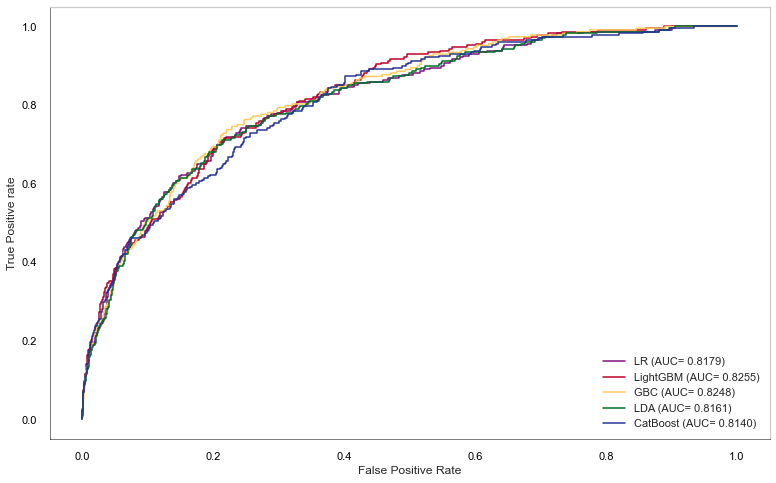

In [43]:
plt.figure(figsize=(10,6))
ax=plt.axes([0,1,1,1])
ax.set_facecolor("White")
plt.grid(False)
ax.spines['left'].set_color('Black')
ax.spines['left'].set_linewidth(1)
ax.spines['left'].set_alpha(0.5)
#ax.spines['left'].set_position(('data', 0))

#ax.tick_params(axis="y",direction="out", pad=-22)

ax.spines['bottom'].set_color('Black')
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_alpha(0.5)
#ax.spines['bottom'].set_position(('data',0))

ax.tick_params(direction='out', length=6, width=1, colors='black', grid_color='black', grid_alpha=0.5)

          
# plot roc curves
plt.plot(fpr4, tpr4, linestyle='-',color='#810f7c', label="LR (AUC= 0.8179)")
plt.plot(fpr1, tpr1, linestyle='-',color='#bd0026', label="LightGBM (AUC= 0.8255)")
plt.plot(fpr2, tpr2, linestyle='-',color='#fecc5c', label="GBC (AUC= 0.8248)")
plt.plot(fpr5, tpr5, linestyle='-',color='#006d2c', label="LDA (AUC= 0.8161)")
plt.plot(fpr3, tpr3, linestyle='-',color='#253494', label="CatBoost (AUC= 0.8140)")

# title
#plt.title('ROC curve')
# x label
#plt.xlabel('False Positive Rate',weight='bold')
plt.xlabel('False Positive Rate')
ax.set_xticks([0,0.2,0.4,0.6,0.8,1])
#plt.xticks(weight='bold')
# y label
plt.ylabel('True Positive rate')
#plt.ylabel('True Positive rate',weight='bold')
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
#plt.yticks(weight='bold')


plt.legend(loc=4)
plt.savefig('Figuer1q1',dpi=400,bbox_inches='tight')
plt.savefig('Figuer1q1.tiff',dpi=400,bbox_inches='tight')
plt.savefig('Figuer1q1.tif',dpi=400,bbox_inches='tight')

plt.show()

## Figure Models Performance by Number of Variables

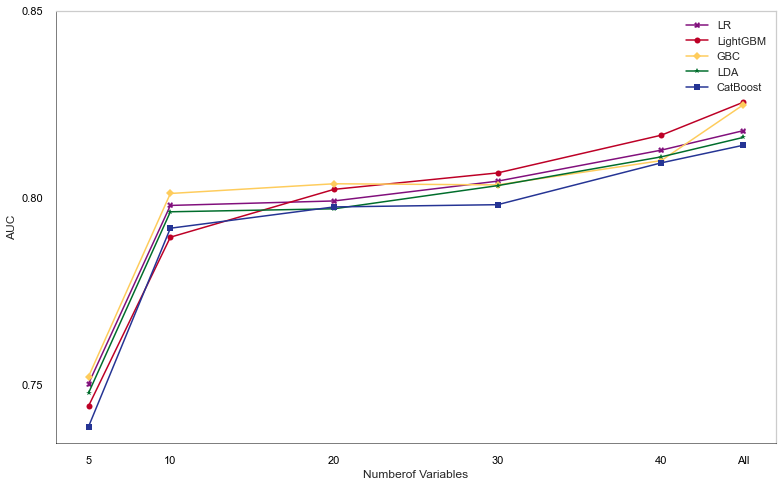

In [44]:
plt.figure(figsize=(10,6))
ax=plt.axes([0,1,1,1])
ax.set_facecolor("White")
plt.grid(False)
ax.spines['left'].set_color('Black')
ax.spines['left'].set_linewidth(1)
ax.spines['left'].set_alpha(0.5)
#ax.spines['left'].set_position(('data', 0))

#ax.tick_params(axis="y",direction="out", pad=-22)

ax.spines['bottom'].set_color('Black')
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_alpha(0.5)
#ax.spines['bottom'].set_position(('data',0))

ax.tick_params(direction='out', length=6, width=1, colors='black', grid_color='black', grid_alpha=0.1)



nov = [5,10,20,30,40,45]
LR = [0.7502,0.7979,0.7991,0.8044,0.8127,0.8179]
LightGBM = [0.7442,0.7894,0.8022,0.8066,0.8167,0.8255]
GBC = [0.7521,0.8011,0.8037,0.8034,0.8099,0.8248,]
LDA = [0.7477,0.7962,0.7970,0.8032,0.8109,0.8161]
CatBoost = [0.7387,0.7918,0.7975,0.7981,0.8093,0.8140]


line_chart1 = plt.plot(nov,LR, color='#810f7c',marker="X", label = 'LR')
line_chart2 = plt.plot(nov, LightGBM, color='#bd0026',marker="o", label = 'LightGBM')
line_chart3 = plt.plot(nov, GBC,color='#fecc5c',marker="D", label = 'GBC')
line_chart4 = plt.plot(nov, LDA, color='#006d2c',marker="*", label = 'LDA')
line_chart5 = plt.plot(nov,CatBoost, color='#253494',marker="s", label = 'CatBoost')


plt.xlabel('Numberof Variables')
plt.xticks([5,10,20,30,40,45])
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = '5'
labels[1] = '10'
labels[2] = '20'
labels[3] = '30'
labels[4] = '40'
labels[5] = 'All'
ax.set_xticklabels(labels)
#plt.xlabel('Numberof Variables',weight='bold')
#plt.xticks([5, 10,20,30,40,48],weight='bold')


plt.ylabel('AUC')
plt.yticks([0.75,0.80,0.85])
#plt.ylabel('AUC',weight='bold')
#plt.yticks([0.85, 0.90,0.95,1],weight='bold')

#plt.title('Models Performance by Number of Variables')





plt.legend(loc='best')

#plt.legend(['1-7 July 2019', '8-14 July 2019'], loc=3)
plt.savefig('Q1Fig2',dpi=300,bbox_inches='tight')
plt.savefig('Q1Fig2.tiff',dpi=300,bbox_inches='tight')
plt.savefig('Q1Fig2.tif',dpi=300,bbox_inches='tight')

plt.show()

## Figure Ranking

In [ ]:
LightGBM ={"Feature": ["Fluid and\nElectrolyte","Age","Liver\nDisease","Hypertension","Peripheral \nVascular","Dyslipidemia","Cardiac\nArrhythmias","Smoker","Coagulopathy","Prior PPM","Chronic\nKidney Disease","Pulmonary\nCirculation","Prior PCI","Carotid Artery\nDisease"], "Rank":[2,1,4,7,3,9,5,6,11,13,8,15,12,14]}
GBC={"Feature": ["Fluid and\nElectrolyte","Age","Liver\nDisease","Hypertension","Peripheral \nVascular","Dyslipidemia","Cardiac\nArrhythmias","Smoker","Coagulopathy","Prior PPM","Chronic\nKidney Disease","Pulmonary\nCirculation","Prior PCI",], "Rank":[1,5,3,4,7,2,9,6,8,13,10,9,14]} 
CatBoost={"Feature": ["Fluid and\nElectrolyte","Age","Liver\nDisease","Hypertension","Peripheral \nVascular","Dyslipidemia","Coagulopathy","Prior PPM","Chronic\nKidney Disease","Anemia","Cancer","Prior PCI","Carotid Artery\nDisease"], "Rank":[2,1,5,8,3,6,10,13,12,14,11,4,7]}
LR={"Feature": ["Fluid and\nElectrolyte","Age","Liver\nDisease","Hypertension","Peripheral \nVascular","Dyslipidemia","Cardiac\nArrhythmias","Smoker","Coagulopathy","Prior PPM","Chronic\nKidney Disease","Anemia","Cancer","Pulmonary\nCirculation","Carotid Artery\nDisease"], "Rank":[2,1,3,5,8,9,7,12,10,6,15,11,13,14,16,]}
LDA={"Feature": ["Fluid and\nElectrolyte","Age","Liver\nDisease","Hypertension","Peripheral \nVascular","Dyslipidemia","Cardiac\nArrhythmias","Smoker","Coagulopathy","Prior PPM","Chronic\nKidney Disease","Anemia","Cancer","Pulmonary\nCirculation","Carotid Artery\nDisease"], "Rank":[2,1,3,4,9,8,7,11,10,6,15,12,14,13,16,]}

LightGBM1 ={"Feature": ["Fluid and Electrolyte"], "Rank":[2]}
GBC1={"Feature": ["Fluid and Electrolyte"], "Rank":[1]} 
CatBoost1={"Feature": ["Fluid and Electrolyte"], "Rank":[2]}
LR1={"Feature": ["Fluid and Electrolyte"], "Rank":[2]}
LDA1={"Feature": ["Fluid and Electrolyte"], "Rank":[2]}

LR={"Feature": ["Age","Fluid and\nElectrolyte","Liver\nDisease","Hypertension","Dyslipidemia","Peripheral \nVascular","Cardiac\nArrhythmias","Coagulopathy","Prior PPM","Smoker","Chronic\nKidney Disease","Anemia","Pulmonary\nCirculation","Carotid Artery\nDisease","Cancer"], "Rank":[1,2,3,4,7,8,6,9,5,10,14,11,13,15,12]}
LightGBM={"Feature": ["Age","Fluid and\nElectrolyte","Liver\nDisease","Hypertension","Dyslipidemia","Peripheral \nVascular","Cardiac\nArrhythmias","Coagulopathy","Prior PPM","Smoker","Chronic\nKidney Disease","Anemia","Pulmonary\nCirculation","Carotid Artery\nDisease","Cancer"], "Rank":[1,2,5,6,7,3,4,10,11,8,9,12,13,14,15]}
GBC={"Feature": ["Age","Fluid and\nElectrolyte","Liver\nDisease","Hypertension","Dyslipidemia","Peripheral \nVascular","Cardiac\nArrhythmias","Coagulopathy","Prior PPM","Smoker","Chronic\nKidney Disease","Anemia","Pulmonary\nCirculation","Carotid Artery\nDisease","Cancer"], "Rank":[5,1,2,4,3,8,7,6,12,10,9,14,11,15,13]}
LDA={"Feature": ["Age","Fluid and\nElectrolyte","Liver\nDisease","Hypertension","Dyslipidemia","Peripheral \nVascular","Cardiac\nArrhythmias","Coagulopathy","Prior PPM","Smoker","Chronic\nKidney Disease","Anemia","Pulmonary\nCirculation","Carotid Artery\nDisease","Cancer"], "Rank":[1,2,3,4,7,8,6,9,5,10,14,11,12,15,13]}
CatBoost={"Feature": ["Age","Fluid and\nElectrolyte","Liver\nDisease","Hypertension","Dyslipidemia","Peripheral \nVascular","Cardiac\nArrhythmias","Coagulopathy","Prior PPM","Smoker","Chronic\nKidney Disease","Anemia","Pulmonary\nCirculation","Carotid Artery\nDisease","Cancer"], "Rank":[1,2,4,10,5,3,7,9,11,8,12,14,15,6,13]}


LR1={"Feature": ["Age"], "Rank":[1]}
LightGBM1 ={"Feature": ["Age"], "Rank":[1]}
GBC1={"Feature": ["Age"], "Rank":[5]} 
LDA1={"Feature": ["Age"], "Rank":[1]}
CatBoost1={"Feature": ["Age"], "Rank":[1]}

sns.set(rc = {'figure.figsize':(18,9)})
sns.set_style("white")

sns.stripplot(x="Feature", y="Rank",data=LightGBM1,palette=['#bd0026'], marker="x",linewidth=1,size = 10,edgecolor='none',label='LightGBM')
sns.stripplot(x="Feature", y="Rank", data=GBC1, dodge=False,palette=['#fecc5c'], marker="o",linewidth=1,size = 10,edgecolor='none',label='GBC')
sns.stripplot(x="Feature", y="Rank", data=CatBoost1, dodge=False,palette=['#253494'], marker="^",linewidth=1,size = 10,edgecolor='none',label='CatBoost')
sns.stripplot(x="Feature", y="Rank", data=LR1, dodge=False,palette=['#810f7c'], marker="+",linewidth=1,size = 10,edgecolor='none',label='LR')
sns.stripplot(x="Feature", y="Rank", data=LDA1, dodge=False,palette=['#006d2c'], marker="*",linewidth=1,size = 10,edgecolor='none',label='LDA')

sns.stripplot(x="Feature", y="Rank",data=LightGBM, dodge=False,palette=['#bd0026'], marker="x",linewidth=1,size = 10,edgecolor='none')
sns.stripplot(x="Feature", y="Rank", data=GBC, dodge=False,palette=['#fecc5c'], marker="o",linewidth=1,size = 10,edgecolor='none')
sns.stripplot(x="Feature", y="Rank", data=CatBoost, dodge=False,palette=['#253494'], marker="^",linewidth=1,size = 10,edgecolor='none')
sns.stripplot(x="Feature", y="Rank", data=LR, dodge=False,palette=['#810f7c'], marker="+",linewidth=1,size = 10,edgecolor='none')
sns.stripplot(x="Feature", y="Rank", data=LDA, dodge=False,palette=['#006d2c'], marker="*",linewidth=1,size = 10,edgecolor='none')
#plt.xlabel(["Cardiac\nArrest","Cardiogenic\nShock","Age","Conversiont\nTo SAVR","Sepsis","Anystroke","Vascular\nComplications","AKI","Fluid And\nElectrolyte","Major\nBleeding","Peripheral\nVascular","Dyslipidemia","Prior\nStroke","Respiratory\nComplications"],weight='bold')
plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],weight='bold')                
plt.xlabel('Feature')
plt.ylabel('Rank')
#ax.legend(fontsize=100,loc=2)
plt.legend(loc=2)
plt.savefig('figure33q1',dpi=300,bbox_inches='tight')
plt.savefig('figure33q1.tiff',dpi=300,bbox_inches='tight')
plt.show()

In [ ]:

LightGBM ={"Feature": ["Fluid and\nElectrolyte","Age","Liver\nDisease","Hypertension","Peripheral \nVascular","Dyslipidemia","Cardiac\nArrhythmias","Smoker","Coagulopathy","Prior PPM","Chronic\nKidney Disease","Pulmonary\nCirculation","Prior PCI","Carotid Artery\nDisease"], "Rank":[2,1,4,7,3,9,5,6,11,13,8,15,12,14]}
GBC={"Feature": ["Fluid and\nElectrolyte","Age","Liver\nDisease","Hypertension","Peripheral \nVascular","Dyslipidemia","Cardiac\nArrhythmias","Smoker","Coagulopathy","Prior PPM","Chronic\nKidney Disease","Pulmonary\nCirculation","Prior PCI",], "Rank":[1,5,3,4,7,2,9,6,8,13,10,9,14]} 
CatBoost={"Feature": ["Fluid and\nElectrolyte","Age","Liver\nDisease","Hypertension","Peripheral \nVascular","Dyslipidemia","Coagulopathy","Prior PPM","Chronic\nKidney Disease","Anemia","Cancer","Prior PCI","Carotid Artery\nDisease"], "Rank":[2,1,5,8,3,6,10,13,12,14,11,4,7]}
LR={"Feature": ["Fluid and\nElectrolyte","Age","Liver\nDisease","Hypertension","Peripheral \nVascular","Dyslipidemia","Cardiac\nArrhythmias","Smoker","Coagulopathy","Prior PPM","Chronic\nKidney Disease","Anemia","Cancer","Pulmonary\nCirculation","Carotid Artery\nDisease"], "Rank":[2,1,3,5,8,9,7,12,10,6,15,11,13,14,16,]}
LDA={"Feature": ["Fluid and\nElectrolyte","Age","Liver\nDisease","Hypertension","Peripheral \nVascular","Dyslipidemia","Cardiac\nArrhythmias","Smoker","Coagulopathy","Prior PPM","Chronic\nKidney Disease","Anemia","Cancer","Pulmonary\nCirculation","Carotid Artery\nDisease"], "Rank":[2,1,3,4,9,8,7,11,10,6,15,12,14,13,16,]}

LightGBM1 ={"Feature": ["Fluid and Electrolyte"], "Rank":[2]}
GBC1={"Feature": ["Fluid and Electrolyte"], "Rank":[1]} 
CatBoost1={"Feature": ["Fluid and Electrolyte"], "Rank":[2]}
LR1={"Feature": ["Fluid and Electrolyte"], "Rank":[2]}
LDA1={"Feature": ["Fluid and Electrolyte"], "Rank":[2]}


LR={"Feature": ["Age","Fluid and\nElectrolyte","Liver\nDisease","Hypertension","Dyslipidemia","Peripheral \nVascular","Cardiac\nArrhythmias","Coagulopathy","Prior PPM","Smoker","Chronic\nKidney Disease","Anemia","Pulmonary\nCirculation","Carotid Artery\nDisease","Cancer"], "Rank":[1,2,3,4,7,8,6,9,5,10,14,11,13,15,12]}
LightGBM={"Feature": ["Age","Fluid and\nElectrolyte","Liver\nDisease","Hypertension","Dyslipidemia","Peripheral \nVascular","Cardiac\nArrhythmias","Coagulopathy","Prior PPM","Smoker","Chronic\nKidney Disease","Anemia","Pulmonary\nCirculation","Carotid Artery\nDisease","Cancer"], "Rank":[1,2,5,6,7,3,4,10,11,8,9,12,13,14,15]}
GBC={"Feature": ["Age","Fluid and\nElectrolyte","Liver\nDisease","Hypertension","Dyslipidemia","Peripheral \nVascular","Cardiac\nArrhythmias","Coagulopathy","Prior PPM","Smoker","Chronic\nKidney Disease","Anemia","Pulmonary\nCirculation","Carotid Artery\nDisease","Cancer"], "Rank":[5,1,2,4,3,8,7,6,12,10,9,14,11,15,13]}
LDA={"Feature": ["Age","Fluid and\nElectrolyte","Liver\nDisease","Hypertension","Dyslipidemia","Peripheral \nVascular","Cardiac\nArrhythmias","Coagulopathy","Prior PPM","Smoker","Chronic\nKidney Disease","Anemia","Pulmonary\nCirculation","Carotid Artery\nDisease","Cancer"], "Rank":[1,2,3,4,7,8,6,9,5,10,14,11,12,15,13]}
CatBoost={"Feature": ["Age","Fluid and\nElectrolyte","Liver\nDisease","Hypertension","Dyslipidemia","Peripheral \nVascular","Cardiac\nArrhythmias","Coagulopathy","Prior PPM","Smoker","Chronic\nKidney Disease","Anemia","Pulmonary\nCirculation","Carotid Artery\nDisease","Cancer"], "Rank":[1,2,4,10,5,3,7,9,11,8,12,14,15,6,13]}


LR1={"Feature": ["Age"], "Rank":[1]}
LightGBM1 ={"Feature": ["Age"], "Rank":[1]}
GBC1={"Feature": ["Age"], "Rank":[5]} 
LDA1={"Feature": ["Age"], "Rank":[1]}
CatBoost1={"Feature": ["Age"], "Rank":[1]}

sns.set(rc = {'figure.figsize':(18,9)})
sns.set_style("whitegrid")
#sns.stripplot(x="Feature", y="Rank",data=LightGBM,palette=['#bd0026'], marker="x",linewidth=1,size = 10,edgecolor='none')
#sns.stripplot(x="Feature", y="Rank", data=GBC, dodge=False,palette=['#fecc5c'], marker="o",linewidth=1,size = 10,edgecolor='none')
#sns.stripplot(x="Feature", y="Rank", data=CatBoost, dodge=False,palette=['#253494'], marker="^",linewidth=1,size = 10,edgecolor='none')
#sns.stripplot(x="Feature", y="Rank", data=LR, dodge=False,palette=['#810f7c'], marker="+",linewidth=1,size = 10,edgecolor='none')
#sns.stripplot(x="Feature", y="Rank", data=LDA, dodge=False,palette=['#006d2c'], marker="*",linewidth=1,size = 10,edgecolor='none')



#sns.stripplot(x="Feature", y="Rank",data=LightGBM1,palette=['#bd0026'], marker="x",linewidth=1,size = 10,edgecolor='none',label='LightGBM')
#sns.stripplot(x="Feature", y="Rank", data=GBC1, dodge=False,palette=['#fecc5c'], marker="o",linewidth=1,size = 10,edgecolor='none',label='GBC')
#sns.stripplot(x="Feature", y="Rank", data=CatBoost1, dodge=False,palette=['#253494'], marker="^",linewidth=1,size = 10,edgecolor='none',label='CatBoost')
#sns.stripplot(x="Feature", y="Rank", data=LR1, dodge=False,palette=['#810f7c'], marker="+",linewidth=1,size = 10,edgecolor='none',label='LR')
#sns.stripplot(x="Feature", y="Rank", data=LDA1, dodge=False,palette=['#006d2c'], marker="*",linewidth=1,size = 10,edgecolor='none',label='LDA')

ax=sns.stripplot(x="Feature", y="Rank",data=LightGBM, dodge=False,palette=['#bd0026'], marker="x",linewidth=1,size = 10,edgecolor='none')
ax=sns.stripplot(x="Feature", y="Rank", data=GBC, dodge=False,palette=['#fecc5c'], marker="o",linewidth=1,size = 10,edgecolor='none')
ax=sns.stripplot(x="Feature", y="Rank", data=CatBoost, dodge=False,palette=['#253494'], marker="^",linewidth=1,size = 10,edgecolor='none')
ax=sns.stripplot(x="Feature", y="Rank", data=LR, dodge=False,palette=['#810f7c'], marker="+",linewidth=1,size = 10,edgecolor='none')
ax=sns.stripplot(x="Feature", y="Rank", data=LDA, dodge=False,palette=['#006d2c'], marker="*",linewidth=1,size = 10,edgecolor='none')
#plt.xlabel(["Cardiac\nArrest","Cardiogenic\nShock","Age","Conversiont\nTo SAVR","Sepsis","Anystroke","Vascular\nComplications","AKI","Fluid And\nElectrolyte","Major\nBleeding","Peripheral\nVascular","Dyslipidemia","Prior\nStroke","Respiratory\nComplications"],weight='bold')
plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],weight='bold')                
plt.xlabel('Feature')
plt.ylabel('Rank')
#ax.legend(fontsize=100,loc=2)


plt.legend(loc=2)
plt.savefig('figure3q1',dpi=300,bbox_inches='tight')
plt.savefig('figure3q1.tiff',dpi=300,bbox_inches='tight')
plt.show()

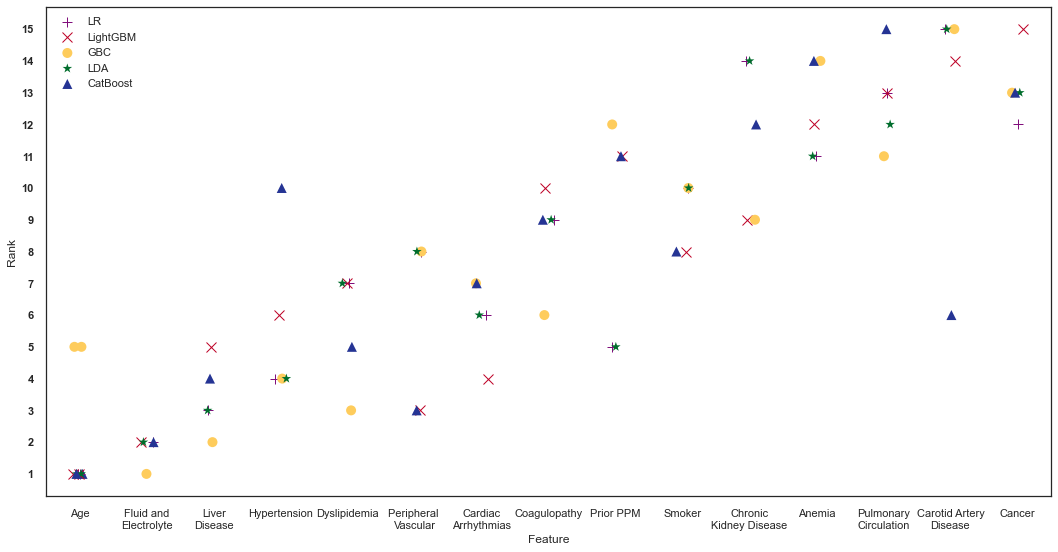

In [41]:
LR={"Feature": ["Age","Fluid and\nElectrolyte","Liver\nDisease","Hypertension","Dyslipidemia","Peripheral \nVascular","Cardiac\nArrhythmias","Coagulopathy","Prior PPM","Smoker","Chronic\nKidney Disease","Anemia","Pulmonary\nCirculation","Carotid Artery\nDisease","Cancer"], "Rank":[1,2,3,4,7,8,6,9,5,10,14,11,13,15,12]}
LightGBM={"Feature": ["Age","Fluid and\nElectrolyte","Liver\nDisease","Hypertension","Dyslipidemia","Peripheral \nVascular","Cardiac\nArrhythmias","Coagulopathy","Prior PPM","Smoker","Chronic\nKidney Disease","Anemia","Pulmonary\nCirculation","Carotid Artery\nDisease","Cancer"], "Rank":[1,2,5,6,7,3,4,10,11,8,9,12,13,14,15]}
GBC={"Feature": ["Age","Fluid and\nElectrolyte","Liver\nDisease","Hypertension","Dyslipidemia","Peripheral \nVascular","Cardiac\nArrhythmias","Coagulopathy","Prior PPM","Smoker","Chronic\nKidney Disease","Anemia","Pulmonary\nCirculation","Carotid Artery\nDisease","Cancer"], "Rank":[5,1,2,4,3,8,7,6,12,10,9,14,11,15,13]}
LDA={"Feature": ["Age","Fluid and\nElectrolyte","Liver\nDisease","Hypertension","Dyslipidemia","Peripheral \nVascular","Cardiac\nArrhythmias","Coagulopathy","Prior PPM","Smoker","Chronic\nKidney Disease","Anemia","Pulmonary\nCirculation","Carotid Artery\nDisease","Cancer"], "Rank":[1,2,3,4,7,8,6,9,5,10,14,11,12,15,13]}
CatBoost={"Feature": ["Age","Fluid and\nElectrolyte","Liver\nDisease","Hypertension","Dyslipidemia","Peripheral \nVascular","Cardiac\nArrhythmias","Coagulopathy","Prior PPM","Smoker","Chronic\nKidney Disease","Anemia","Pulmonary\nCirculation","Carotid Artery\nDisease","Cancer"], "Rank":[1,2,4,10,5,3,7,9,11,8,12,14,15,6,13]}


LR1={"Feature": ["Age"], "Rank":[1]}
LightGBM1 ={"Feature": ["Age"], "Rank":[1]}
GBC1={"Feature": ["Age"], "Rank":[5]} 
LDA1={"Feature": ["Age"], "Rank":[1]}
CatBoost1={"Feature": ["Age"], "Rank":[1]}


sns.set(rc = {'figure.figsize':(18,9)})
sns.set_style("white")

sns.stripplot(x="Feature", y="Rank", data=LR1, dodge=False,palette=['#810f7c'], marker="+",linewidth=1,size = 10,edgecolor='none',label='LR')
sns.stripplot(x="Feature", y="Rank",data=LightGBM1,palette=['#bd0026'], marker="x",linewidth=1,size = 10,edgecolor='none',label='LightGBM')
sns.stripplot(x="Feature", y="Rank", data=GBC1, dodge=False,palette=['#fecc5c'], marker="o",linewidth=1,size = 10,edgecolor='none',label='GBC')
sns.stripplot(x="Feature", y="Rank", data=LDA1, dodge=False,palette=['#006d2c'], marker="*",linewidth=1,size = 10,edgecolor='none',label='LDA')
sns.stripplot(x="Feature", y="Rank", data=CatBoost1, dodge=False,palette=['#253494'], marker="^",linewidth=1,size = 10,edgecolor='none',label='CatBoost')

sns.stripplot(x="Feature", y="Rank", data=LR, dodge=False,palette=['#810f7c'], marker="+",linewidth=1,size = 10,edgecolor='none')
sns.stripplot(x="Feature", y="Rank",data=LightGBM, dodge=False,palette=['#bd0026'], marker="x",linewidth=1,size = 10,edgecolor='none')
sns.stripplot(x="Feature", y="Rank", data=GBC, dodge=False,palette=['#fecc5c'], marker="o",linewidth=1,size = 10,edgecolor='none')
sns.stripplot(x="Feature", y="Rank", data=LDA, dodge=False,palette=['#006d2c'], marker="*",linewidth=1,size = 10,edgecolor='none')
sns.stripplot(x="Feature", y="Rank", data=CatBoost, dodge=False,palette=['#253494'], marker="^",linewidth=1,size = 10,edgecolor='none')


#plt.xlabel(["Cardiac\nArrest","Cardiogenic\nShock","Age","Conversiont\nTo SAVR","Sepsis","Anystroke","Vascular\nComplications","AKI","Fluid And\nElectrolyte","Major\nBleeding","Peripheral\nVascular","Dyslipidemia","Prior\nStroke","Respiratory\nComplications"],weight='bold')

plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],weight='bold')                
plt.xlabel('Feature')
plt.ylabel('Rank')
#ax.legend(fontsize=100,loc=2)
plt.legend(loc=2)
plt.savefig('figure33q1',dpi=300,bbox_inches='tight')
plt.savefig('figure33q1.tiff',dpi=300,bbox_inches='tight')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


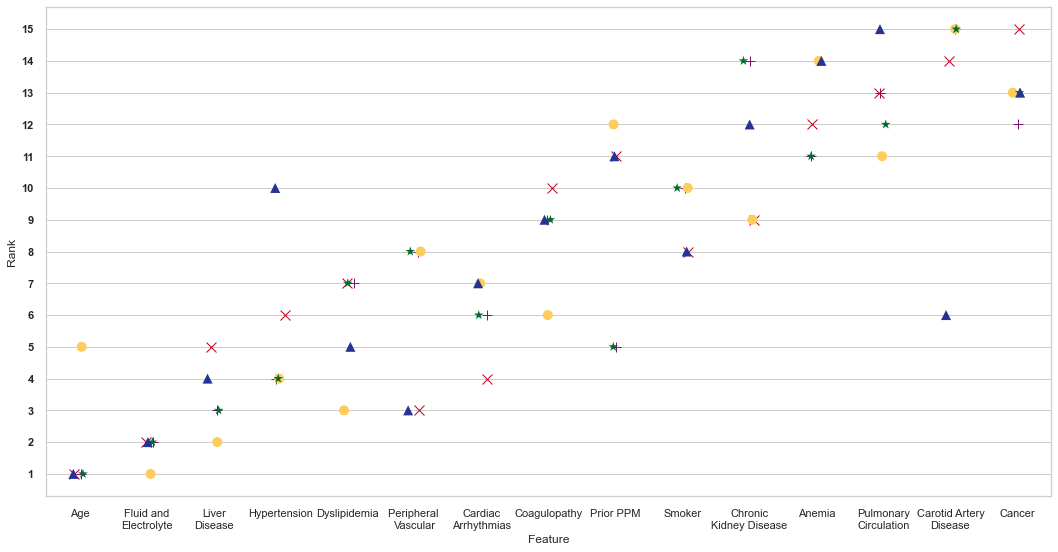

In [42]:

LR={"Feature": ["Age","Fluid and\nElectrolyte","Liver\nDisease","Hypertension","Dyslipidemia","Peripheral \nVascular","Cardiac\nArrhythmias","Coagulopathy","Prior PPM","Smoker","Chronic\nKidney Disease","Anemia","Pulmonary\nCirculation","Carotid Artery\nDisease","Cancer"], "Rank":[1,2,3,4,7,8,6,9,5,10,14,11,13,15,12]}
LightGBM={"Feature": ["Age","Fluid and\nElectrolyte","Liver\nDisease","Hypertension","Dyslipidemia","Peripheral \nVascular","Cardiac\nArrhythmias","Coagulopathy","Prior PPM","Smoker","Chronic\nKidney Disease","Anemia","Pulmonary\nCirculation","Carotid Artery\nDisease","Cancer"], "Rank":[1,2,5,6,7,3,4,10,11,8,9,12,13,14,15]}
GBC={"Feature": ["Age","Fluid and\nElectrolyte","Liver\nDisease","Hypertension","Dyslipidemia","Peripheral \nVascular","Cardiac\nArrhythmias","Coagulopathy","Prior PPM","Smoker","Chronic\nKidney Disease","Anemia","Pulmonary\nCirculation","Carotid Artery\nDisease","Cancer"], "Rank":[5,1,2,4,3,8,7,6,12,10,9,14,11,15,13]}
LDA={"Feature": ["Age","Fluid and\nElectrolyte","Liver\nDisease","Hypertension","Dyslipidemia","Peripheral \nVascular","Cardiac\nArrhythmias","Coagulopathy","Prior PPM","Smoker","Chronic\nKidney Disease","Anemia","Pulmonary\nCirculation","Carotid Artery\nDisease","Cancer"], "Rank":[1,2,3,4,7,8,6,9,5,10,14,11,12,15,13]}
CatBoost={"Feature": ["Age","Fluid and\nElectrolyte","Liver\nDisease","Hypertension","Dyslipidemia","Peripheral \nVascular","Cardiac\nArrhythmias","Coagulopathy","Prior PPM","Smoker","Chronic\nKidney Disease","Anemia","Pulmonary\nCirculation","Carotid Artery\nDisease","Cancer"], "Rank":[1,2,4,10,5,3,7,9,11,8,12,14,15,6,13]}


LR1={"Feature": ["Age"], "Rank":[1]}
LightGBM1 ={"Feature": ["Age"], "Rank":[1]}
GBC1={"Feature": ["Age"], "Rank":[5]} 
LDA1={"Feature": ["Age"], "Rank":[1]}
CatBoost1={"Feature": ["Age"], "Rank":[1]}

sns.set(rc = {'figure.figsize':(18,9)})
sns.set_style("whitegrid")

ax=sns.stripplot(x="Feature", y="Rank", data=LR, dodge=False,palette=['#810f7c'], marker="+",linewidth=1,size = 10,edgecolor='none')
ax=sns.stripplot(x="Feature", y="Rank",data=LightGBM, dodge=False,palette=['#bd0026'], marker="x",linewidth=1,size = 10,edgecolor='none')
ax=sns.stripplot(x="Feature", y="Rank", data=GBC, dodge=False,palette=['#fecc5c'], marker="o",linewidth=1,size = 10,edgecolor='none')
ax=sns.stripplot(x="Feature", y="Rank", data=LDA, dodge=False,palette=['#006d2c'], marker="*",linewidth=1,size = 10,edgecolor='none')
ax=sns.stripplot(x="Feature", y="Rank", data=CatBoost, dodge=False,palette=['#253494'], marker="^",linewidth=1,size = 10,edgecolor='none')


#plt.xlabel(["Cardiac\nArrest","Cardiogenic\nShock","Age","Conversiont\nTo SAVR","Sepsis","Anystroke","Vascular\nComplications","AKI","Fluid And\nElectrolyte","Major\nBleeding","Peripheral\nVascular","Dyslipidemia","Prior\nStroke","Respiratory\nComplications"],weight='bold')
plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],weight='bold')                
plt.xlabel('Feature')
plt.ylabel('Rank')
#ax.legend(fontsize=100,loc=2)


plt.legend(loc=2)
plt.savefig('figure3q1',dpi=300,bbox_inches='tight')
plt.savefig('figure3q1.tiff',dpi=300,bbox_inches='tight')
plt.show()